# Machine learning on wine

**Topics:** Text analysis, linear regression, logistic regression, text analysis, classification

**Datasets**

- **wine-reviews.csv** Wine reviews scraped from https://www.winemag.com/
- **Data dictionary:** just go [here](https://www.winemag.com/buying-guide/tenuta-dellornellaia-2007-masseto-merlot-toscana/) and look at the page

## The background

You work in the **worst newsroom in the world**, and you've had a hard few weeks at work - a couple stories killed, a few scoops stolen out from under you. It's not going well.

And because things just can't get any worse: your boss shows up, carrying a huge binder. She slams it down on your desk.

"You know some machine learning stuff, right?"

You say "no," but she isn't listening. She's giving you an assignment, the _worst assignment_...

> Machine learning is the new maps. Let's get some hits!
>
> **Do some machine learning on this stuff.**

"This stuff" is wine reviews.

## A tiny, meagre bit of help

You have a dataset. It has some stuff in it:

* **Numbers:**
    - Year published
    - Alcohol percentage
    - Price
    - Score
    - Bottle size
* **Categories:**
    - Red vs white
    - Different countries
    - Importer
    - Designation
    - Taster
    - Variety
    - Winery
* **Free text:**
    - Wine description

# Cleaning up your data

Many of these pieces - the alcohol, the year produced, the bottle size, the country the wine is from - aren't in a format you can use. Convert the ones to numbers that are numbers, and extract the others from the appropriate strings.

In [1]:
import pandas as pd
import numpy as np
import re

pd.set_option('display.max_columns', 200)

In [2]:
df = pd.read_csv("wine-reviews.csv")
df.head(1)

,url,wine_points,wine_name,wine_desc,taster,price,designation,variety,appellation,winery,alcohol,bottle size,category,importer,date published,user avg rating
0,https://www.winemag.com/buying-guide/artadi-20...,90.0,Artadi 2011 Viñas de Gain (Rioja),"Inky, minerally aromas of blackberry, black pl...",Michael Schachner,"$25, Buy Now",Viñas de Gain,Tempranillo,"Rioja, Northern Spain, Spain",Artadi,14.5%,750 ml,Red,Folio Fine Wine Partners,12/1/2014,Not rated yet [Add Your Review]


In [3]:
df['alcohol'].unique()

array(['14.5%', '13.5%', '13%', '12.5%', '14%', '15%', '13.8%', '12%',
       '20%', '13.9%', '8%', '14.8%', '13.1%', '14.3%', nan, '7.5%',
       '14.1%', '14.7%', '11.5%', '13.4%', '13.7%', '14.2%', '11%',
       '8.5%', '14.9%', '15.6%', '14.6%', '15.5%', '14.4%', '11.6%', '7%',
       '15.8%', '9%', '16%', '17%', '15.2%', '10%', '12.4%', '12.9%',
       '10.5%', '9.4%', '13.3%', '12.8%', '5.5%', '15.1%', '13.6%',
       '10.4%', '15.7%', '9.5%', '18%', '14.77%', '12.1%', '16.2%',
       '12.6%', '9.9%', '15.3%', '12.7%', '12.3%', '12.2%', '14.63%',
       '11.9%', '14.91%', '16.1%', '16.5%', '6.5%', '15.9%', '15.4%',
       '13.2%', '11.8%', '12.95%', '19.5%', '17.5%', '10.3%', '20.5%',
       '16.3%', '8.6%', '13.64%', '7.6%', '21%', '19%', '15.55%', '11.7%',
       '8.9%', '14.19%', '14.57%', '2%', '15.26%', '4.5%', '6%', '13.03%',
       '3.5%', '5%', '14.34%', '13.28%', '16.4%', '11.4%', '14.13%',
       '13.96%', '14.09%', '14.01%', '9.6%', '14.56%', '50%', '9.1%',
       '9.3

In [4]:
#fix prices
df['price'] = df['price'].str.replace(r"[^0-9]",'')
df['price'] = df['price'].replace(r'^\s*$', np.nan, regex=True).astype(float)

In [5]:
#Getting rid of erroneous values in alcohol
df = df[df['alcohol'] != "2200%"]
df = df[df['alcohol'] != "340%"]
df = df[df['alcohol'] != "4920%"]
df = df[df['alcohol'] != "2016%"]
df = df[df['alcohol'] != "1305%"]
#fix alcohol
df['alcohol'] = df['alcohol'].str.replace(r"%",'')
df['alcohol'] = df['alcohol'].replace(r'^\s*$', np.nan, regex=True).astype(float)

In [6]:
df['bottle size'].unique()

array(['750 ml', '500 ml', '750ML', '375 ml', '375ML', '500ML', '1 L',
       '1.5 L', '3 L', '1.5L', '3L', '187 ml', '1L'], dtype=object)

In [7]:
#fix bottle size
df['bottle size'] = df['bottle size'].str.replace("750 ml", "750")
df['bottle size'] = df['bottle size'].str.replace("500 ml", "500")
df['bottle size'] = df['bottle size'].str.replace("750ML", "750")
df['bottle size'] = df['bottle size'].str.replace("375 ml", "375")
df['bottle size'] = df['bottle size'].str.replace("375ML", "375")
df['bottle size'] = df['bottle size'].str.replace("500ML", "500")
df['bottle size'] = df['bottle size'].str.replace("1 L", "1000")
df['bottle size'] = df['bottle size'].str.replace("1.5 L", "1500")
df['bottle size'] = df['bottle size'].str.replace("3 L", "3000")
df['bottle size'] = df['bottle size'].str.replace("1.5L", "1500")
df['bottle size'] = df['bottle size'].str.replace("3L", "3000")
df['bottle size'] = df['bottle size'].str.replace("187 ml", "187")
df['bottle size'] = df['bottle size'].str.replace("1L", "1000")
df['bottle size'] = df['bottle size'].astype(int)
df['bottle size'].unique()

array([ 750,  500,  375, 1000, 1500, 3000,  187])

In [8]:
#Fix countries
df['appellation'] = df['appellation'].str.split(",").str[-1]
df['appellation'].unique()

array([' Spain', ' US', ' France', ' Argentina', ' Italy', ' Germany',
       ' Portugal', ' Chile', ' Australia', ' South Africa', ' Greece',
       ' New Zealand', ' Moldova', ' Austria', ' Mexico', ' Canada',
       ' Turkey', ' Hungary', ' Brazil', ' Uruguay', ' Israel',
       ' Bulgaria', ' Romania', ' Ukraine', ' Lebanon', ' Peru',
       ' Slovenia', ' Switzerland', ' England', ' Armenia', ' India',
       ' Croatia', ' Kosovo', ' Georgia', ' Cyprus', ' Slovakia',
       ' Morocco', ' Luxembourg', ' Macedonia'], dtype=object)

## What might be interesting in this dataset?

Maybe start out playing around _without_ machine learning. Here are some thoughts to get you started:

* I've heard that since the 90's wine has gone through [Parkerization](https://www.estatewinebrokers.com/blog/the-parkerization-of-wine-in-the-1990s-and-beyond/), an increase in production of high-alcohol, fruity red wines thanks to the influence of wine critic Robert Parker.
* Red and white wines taste different, obviously, but people always use [goofy words to describe them](https://winefolly.com/tutorial/40-wine-descriptions/)
* Once upon a time in 1976 [California wines proved themselves against France](https://en.wikipedia.org/wiki/Judgment_of_Paris_(wine)) and France got very angry about it

In [9]:
df.head(1)

,url,wine_points,wine_name,wine_desc,taster,price,designation,variety,appellation,winery,alcohol,bottle size,category,importer,date published,user avg rating
0,https://www.winemag.com/buying-guide/artadi-20...,90.0,Artadi 2011 Viñas de Gain (Rioja),"Inky, minerally aromas of blackberry, black pl...",Michael Schachner,25.0,Viñas de Gain,Tempranillo,Spain,Artadi,14.5,750,Red,Folio Fine Wine Partners,12/1/2014,Not rated yet [Add Your Review]


In [10]:
#Top 100 most expensive by country
df.sort_values('price', ascending=False).head(100).groupby('appellation')['wine_name'].count().sort_values(ascending=False)

appellation
 France       58
 US           21
 Italy         8
 Spain         4
 Portugal      3
 Germany       2
 Hungary       1
 Chile         1
 Austria       1
 Australia     1
Name: wine_name, dtype: int64

In [11]:
#Top 100 most expensive by type
df.sort_values('price', ascending=False).head(100).groupby('category')['wine_name'].count().sort_values(ascending=False)

category
Red            55
White          24
Sparkling      15
Port/Sherry     3
Dessert         3
Name: wine_name, dtype: int64

In [12]:
#Top 10 most prolific tasters
df.groupby('taster')['wine_name'].count().sort_values(ascending=False)

taster
Roger Voss             7985
Michael Schachner      5119
Paul Gregutt           3646
Joe Czerwinski         2532
Virginie Boone         2058
Kerin O’Keefe          1814
Matt Kettmann          1493
Sean P. Sullivan       1111
Anne Krebiehl MW        957
Jim Gordon              844
Anna Lee C. Iijima      813
Lauren Buzzeo           528
Susan Kostrzewa         492
Alexander Peartree      132
Jeff Jenssen             85
Mike DeSimone            61
Christina Pickard        59
Carrie Dykes             39
Fiona Adams              24
Marshall Tilden III      10
Name: wine_name, dtype: int64

<AxesSubplot:xlabel='date published'>

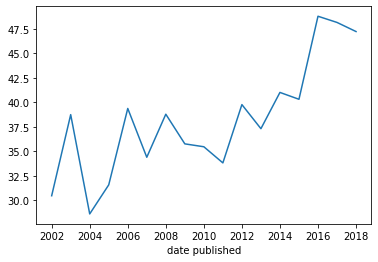

In [13]:
#Mean price of wines reviewed each year
df['date published'] = pd.to_datetime(df['date published'])
df.groupby(df['date published'].dt.year).price.mean().plot()

<AxesSubplot:xlabel='date published'>

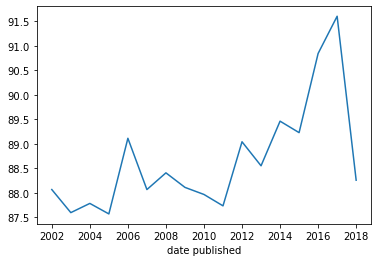

In [14]:
#Mean points for wines reviewed each year
df.groupby(df['date published'].dt.year).wine_points.mean().plot()

## But machine learning?

Well, you can usually break machine learning down into a few different things. These aren't necessarily perfect ways of categorizing things, but eh, close enough.

* **Predicting a number**
    - Linear regression
    - For example, how does a change in unemployment translate into a change in life expectancy?
* **Predicting a category** (aka classification)
    - Lots of algos options: logistic regression, random forest, etc
    - For example, predicting cuisines based on ingredients
* **Seeing what influences a numeric outcome**
    - Linear regression since the output is a number
    - For example, minority and poverty status on test scores 
* **Seeing what influences a categorical outcome**
    - Logistic regression since the output is a category
    - Race and car speed for if you get a waring vs ticket
    - Wet/dry pavement and car weight if you survive or not in a car crash)

We have numbers, we have categories, we have all sorts of stuff. **What are some ways we can mash them together and use machine learning?**

### Brainstorm some ideas

Use the categories above to try to come up with some ideas. Be sure to scroll up where I break down categories vs numbers vs text!

**I'll give you one idea for free:** if you don't have any ideas, start off by creating a classifier that determines whether a wine is white or red based on the wine's description.

In [15]:
#How does country of origin impact alcohol content?

In [16]:
#How does description impact points?

In [17]:
#Are points most impacted by country of origin, description, alcohol content, taster, or category?

In [18]:
#Which flavours are most common in which countries' wines?

You can also go to https://library.columbia.edu and see if you can find some academic papers about wine. I'm sure they'll inspire you! (and they might even have some ML ideas in them you can steal, too)

# Implement 2 of your machine learning ideas

### Predictor of country based on wine description

In [ ]:
# Couldn't get this to work - see below

In [19]:
df.head(1)

,url,wine_points,wine_name,wine_desc,taster,price,designation,variety,appellation,winery,alcohol,bottle size,category,importer,date published,user avg rating
0,https://www.winemag.com/buying-guide/artadi-20...,90.0,Artadi 2011 Viñas de Gain (Rioja),"Inky, minerally aromas of blackberry, black pl...",Michael Schachner,25.0,Viñas de Gain,Tempranillo,Spain,Artadi,14.5,750,Red,Folio Fine Wine Partners,2014-12-01,Not rated yet [Add Your Review]


In [20]:
df = df[df['wine_desc'].notna()]

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

# Make a vectorizer
vectorizer = CountVectorizer()

# Learn and count the words in df.content
matrix = vectorizer.fit_transform(df.wine_desc)

# Convert the matrix of counts to a dataframe
words_df = pd.DataFrame(matrix.toarray(),
                        columns=vectorizer.get_feature_names())

In [29]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df['appellation_label'] = le.fit_transform(df.appellation)
df.head(1)

,url,wine_points,wine_name,wine_desc,taster,price,designation,variety,appellation,winery,alcohol,bottle size,category,importer,date published,user avg rating,appellation_label
0,https://www.winemag.com/buying-guide/artadi-20...,90.0,Artadi 2011 Viñas de Gain (Rioja),"Inky, minerally aromas of blackberry, black pl...",Michael Schachner,25.0,Viñas de Gain,Tempranillo,Spain,Artadi,14.5,750,Red,Folio Fine Wine Partners,2014-12-01,Not rated yet [Add Your Review],33


In [25]:
X = words_df
y = df.appellation_label

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [27]:
from sklearn.svm import LinearSVC
clf = LinearSVC(max_iter=10000)
clf.fit(X_train, y_train)

LinearSVC(max_iter=10000)

In [28]:
from sklearn.metrics import confusion_matrix

y_true = y_test
y_pred = clf.predict(X_test)
matrix = confusion_matrix(y_true, y_pred)

label_names = pd.Series(le.classes_)
scores = pd.DataFrame(matrix,
     columns='Predicted ' + label_names,
     index='Is ' + label_names).div(matrix.sum(axis=1), axis=0)
scores.style.background_gradient(cmap='YlGnBu')

ValueError: Shape of passed values is (34, 34), indices imply (39, 39)

### Effect of alcohol + price on points

In [30]:
import statsmodels.formula.api as smf
model = smf.ols('wine_points ~ alcohol + price', data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            wine_points   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     972.3
Date:                Wed, 31 Mar 2021   Prob (F-statistic):               0.00
Time:                        14:52:07   Log-Likelihood:                -87273.
No. Observations:               33305   AIC:                         1.746e+05
Df Residuals:                   33302   BIC:                         1.746e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     84.8750      0.158    536.163      0.000      84.565      85.185
alcohol        0.2580      0.012     22.338      0.000       0.235       0.281
price          0.0075      0.000     36.679      0.000       0.007       0.008
==============================================================================
Omnibus:                     5869.887   Durbin-Watson:                   0.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40296.912
Skew:                          -0.674   Prob(JB):                         0.00
Kurtosis:                       8.217   Cond. No.                         850.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Is the wine red? using description

In [36]:
df['red'] = df['category'].str.contains('Red').astype(int)

In [41]:
train_df = pd.DataFrame({
    'red': df.red,
    'ink': df.wine_desc.str.contains("ink", re.IGNORECASE, na=False).astype(int),
    'blackberry': df.wine_desc.str.contains("blackberry", re.IGNORECASE, na=False).astype(int),
    'currant': df.wine_desc.str.contains("currant", re.IGNORECASE, na=False).astype(int),
    'peach': df.wine_desc.str.contains("peach", re.IGNORECASE, na=False).astype(int),
    'light': df.wine_desc.str.contains("light", re.IGNORECASE, na=False).astype(int),
    'black': df.wine_desc.str.contains("black", re.IGNORECASE, na=False).astype(int),
    'rich': df.wine_desc.str.contains("rich", re.IGNORECASE, na=False).astype(int),
    'fruit': df.wine_desc.str.contains("fruit", re.IGNORECASE, na=False).astype(int),
    'floral': df.wine_desc.str.contains("floral", re.IGNORECASE, na=False).astype(int),
    'cherr': df.wine_desc.str.contains("cherr", re.IGNORECASE, na=False).astype(int),
    'plum': df.wine_desc.str.contains("plum", re.IGNORECASE, na=False).astype(int),
    'lemon': df.wine_desc.str.contains("lemon", re.IGNORECASE, na=False).astype(int),
})
train_df

,red,ink,blackberry,currant,peach,light,black,rich,fruit,floral,cherr,plum,lemon
0,1,0,1,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,1,0,0,1,1,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42290,1,0,0,0,0,0,0,1,1,0,1,0,0
42291,1,0,0,0,0,0,0,0,0,0,0,0,0
42292,1,0,1,0,0,0,1,0,1,0,1,1,0
42293,1,0,0,0,0,1,0,0,1,0,0,1,0


In [42]:
X = train_df.drop(columns='red')
y = train_df.red

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [44]:
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier()
clf.fit(X_train, y_train)

ExtraTreesClassifier()

In [45]:
clf.score(X_test, y_test)

0.7929393852888

In [46]:
from sklearn.metrics import confusion_matrix

y_true = y_test
y_pred = clf.predict(X_test)
matrix = confusion_matrix(y_true, y_pred)

label_names = pd.Series(['not red', 'red'])
pd.DataFrame(matrix,
     columns='Predicted ' + label_names,
     index='Is ' + label_names)

,Predicted not red,Predicted red
Is not red,3894,308
Is red,1868,4439


In [47]:
import eli5

feature_names=list(X.columns)
eli5.show_weights(clf, feature_names=feature_names, show=['description', 'feature_importances'])

Weight,Feature
0.3252 ± 0.2040,black
0.2597 ± 0.0899,cherr
0.1429 ± 0.1057,peach
0.1112 ± 0.0880,lemon
0.0695 ± 0.0259,plum
0.0456 ± 0.1125,blackberry
0.0153 ± 0.0300,currant
0.0104 ± 0.0051,rich
0.0067 ± 0.0050,fruit
0.0049 ± 0.0056,light
